### Instalación de paquetes
Descomentar si no están instalados los paquetes

In [1]:
# !pip install pandas

In [2]:
# !pip install scikit-learn

In [3]:
# !pip install catboost

In [4]:
# !pip install numpy

In [ ]:
# !pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00


### Exploración de los datos

In [31]:
#############! 1. EXPLORACION DE LOS DATOS #############
import pandas as pd
canciones = pd.read_csv("competition_data.csv", index_col=0)
''' 
print(f'cantidad de filas: {canciones.shape[0]}')
print(f'cantidad de columnas: {canciones.shape[1]}')
cant_nan = (canciones.isnull().sum().sum()/(canciones.shape[0]*canciones.shape[1]))*100
print(f"Total de valores faltantes en el dataset: {round(cant_nan,2)} %")
#balanceados los datos?

porcentaje_false = ((canciones[canciones["TARGET"]==0]).shape[0]/canciones.shape[0])*100
print(f"Porcentje de falsos: {porcentaje_false} %")
print(f"Cantidad de valores faltanes por columna: {canciones.isnull().sum()}")
print(f"Cantidad de conn_country distintos de AR: {(canciones['conn_country'] != 'AR').sum()}")
print(canciones['conn_country'].unique())
print(canciones['user_agent_decrypted'].unique())
'''
print(canciones["platform"].unique())




['iOS 11.0 (iPhone8,1)' 'ios' 'iOS 12.4 (iPhone8,1)' 'OS X 11.2.3 [x86 4]'
 'OS X 10.15.5 [x86 8]' 'OS X 10.13.3 [x86 8]' 'iOS 14.2 (iPhone12,3)'
 'OS X 10.14.3 [x86 8]' 'iOS 12.0 (iPhone8,1)' 'OS X 10.16.0 [x86 8]'
 'iOS 13.2.2 (iPhone8,1)' 'OS X 10.15.7 [x86 8]' 'OS X 10.14.5 [x86 8]'
 'osx' 'iOS 15.0 (iPhone12,3)' 'iOS 13.3.1 (iPhone12,3)'
 'iOS 10.2 (iPad6,8,3)' 'OS X 10.13.4 [x86 8]' 'iOS 15.1 (iPhone12,3)'
 'iOS 13.5 (iPhone12,3)' 'iOS 15.4 (iPhone12,3)'
 'Windows 10 (10.0.10586; x86)' 'iOS 15.2 (iPhone12,3)'
 'OS X 12.0.1 [arm 2]' 'iOS 13.1.2 (iPhone8,1)' 'iOS 12.3.1 (iPhone8,1)'
 'OS X 10.15.4 [x86 8]' 'iOS 10.2.1 (iPhone8,1)' 'iOS 16.0 (iPhone12,3)'
 'iOS 10.2.1 (iPad6,8,1)' 'OS X 10.15.1 [x86 8]'
 'Partner apple_tv apple;apple_tv;33ddb95064d1479ab37179579af23b77;;tpapi'
 'OS X 11.6.0 [arm 2]' 'OS X 10.12.4 [x86 8]' 'iOS 14.5.1 (iPhone12,3)'
 'OS X 10.12.3 [x86 8]' 'iOS 10.2.1 (iPad6,8,3)' 'iOS 13.0 (iPhone8,1)'
 'OS X 10.13.1 [x86 8]' 'iOS 14.0.1 (iPhone12,3)'
 'iOS 14.4.2 (i

In [6]:
'''

#############! 1.2 EXPLORACION DE LOS DATOS #############
# Definir las columnas a verificar
columnas_objetivo = [
    "master_metadata_track_name",
    "master_metadata_album_artist_name",
    "master_metadata_album_album_name"
]

# Filtrar filas donde las tres columnas sean NaN
filas_faltantes = canciones[canciones[columnas_objetivo].isnull().all(axis=1)]

# Seleccionar solo las columnas deseadas (las tres columnas + user_id)
columnas_a_mostrar = columnas_objetivo + ["username"]
resultado = filas_faltantes[columnas_a_mostrar]

# Mostrar resultados
#print(resultado)
#print(f"Cantidad de filas donde faltan los tres atributos: {resultado.shape[0]}")
#print(canciones.dtypes)


'''

'\n\n#############! 1.2 EXPLORACION DE LOS DATOS #############\n# Definir las columnas a verificar\ncolumnas_objetivo = [\n    "master_metadata_track_name",\n    "master_metadata_album_artist_name",\n    "master_metadata_album_album_name"\n]\n\n# Filtrar filas donde las tres columnas sean NaN\nfilas_faltantes = canciones[canciones[columnas_objetivo].isnull().all(axis=1)]\n\n# Seleccionar solo las columnas deseadas (las tres columnas + user_id)\ncolumnas_a_mostrar = columnas_objetivo + ["username"]\nresultado = filas_faltantes[columnas_a_mostrar]\n\n# Mostrar resultados\n#print(resultado)\n#print(f"Cantidad de filas donde faltan los tres atributos: {resultado.shape[0]}")\n#print(canciones.dtypes)\n\n\n'

### Preparación de los datos
Modificación del dataset con el objetivo de mejorar performance del modelo

In [ ]:
######## 2. PREPARACIÓN DE DATOS ########
from sklearn.model_selection import train_test_split
import catboost as cb

categorical_cols = [
   "platform", "conn_country",
   "master_metadata_track_name", "master_metadata_album_artist_name",
   "master_metadata_album_album_name", "reason_start"
   ,"user_agent_decrypted"
   , "dia_semana", "hora"
]
def modify_file(f, categorical_cols):
   # como vi que ts como tal no es relevante, agrego features mas especificas
   f["ts"] = pd.to_datetime(f["ts"], utc=True)
   f["dia_semana"] = f["ts"].dt.weekday
   f["hora"] = f["ts"].dt.hour
   f["ts"] = f["ts"].astype("int64") // 10**9

   # Rellenar valores faltantes en las columnas categóricas
   for col in categorical_cols:
      f[col] = f[col].fillna("unknown")

   for col in categorical_cols:
      f[col] = f[col].astype(str)

   '''# Eliminar "spotify_track_uri" si no es relevante
   if "spotify_track_uri" in f.columns:
      f = f.drop(columns=["spotify_track_uri"])
   '''
   f = f.drop(columns=["spotify_track_uri"], errors='ignore')
   f = f.drop(columns=["username"], errors='ignore')

   # Normalizar nombres de columnas
   f.columns = (
      f.columns
      .str.replace(r"[^\w]", "_", regex=True)
      .str.lower()
   )
   return f

canciones = modify_file(canciones, categorical_cols)

####### divido los datos en train y test ########

y = canciones["target"]          # target: lo que quiero predecir
X = canciones.drop(columns=["target"])  # features: todo lo demás

# Dividir en 90% entrenamiento y 10% validación
X_train, X_test, y_train, y_test = train_test_split(
   X, y,
   test_size=0.1,
   random_state=42,
   stratify=y  # mantiene proporciones del target
)

# Crear los Pools para CatBoost
train_data = cb.Pool(X_train, label=y_train, cat_features=categorical_cols)
test_data = cb.Pool(X_test, label=y_test, cat_features=categorical_cols)

### Búsqueda de hiperparámetros

In [ ]:
import pandas as pd
import catboost as cb

modelo = cb.CatBoostClassifier(verbose=0, loss_function='Logloss', eval_metric='AUC', random_seed=42,cat_features=categorical_cols)
grid_params = {
   'iterations': [100, 200, 300],  # Número de iteraciones
   'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
   'depth': [4, 6, 8],  # Profundidad del árbol
   'l2_leaf_reg': [1, 3, 5, 7],  # Regularización L2
}

best_params = modelo.grid_search(
   grid_params, 
   X=X_train,  # Datos de entrenamiento
   y=y_train,        # No es necesario especificar y porque está en el Pool
   cv=3,  # Número de folds para la validación cruzada
   partition_random_seed=42
)
'''
'''


bestTest = 0.8893535027
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8893535	best: 0.8893535 (0)	total: 12.7s	remaining: 22m 43s

bestTest = 0.9022911351
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.9022911	best: 0.9022911 (1)	total: 25s	remaining: 22m 2s

bestTest = 0.9054694616
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.9054695	best: 0.9054695 (2)	total: 33.8s	remaining: 19m 44s

bestTest = 0.8901278801
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8901279	best: 0.9054695 (2)	total: 46.2s	remaining: 20m 2s

bes

'\n'

### Entrenamiento del modelo 
Entrenamiento del modelo con los mejores hiperparámetros encontrados.
Calculo el AUC de la performance del modelo sobre el conjunto de test (10% aleatorio del dataset original). Pruebo sobre el test para comparar la performance de los distintos modelos luego de modificaciones, ya que en la submission del kaggle solo tenemos 3 pruebas por día.

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
print(best_params)

# best{'params': {'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 300},


solo_parametros = best_params["params"]

# Entrenar el modelo
modelofinal = cb.CatBoostClassifier(**solo_parametros, cat_features=categorical_cols, verbose=100)

# Entrenar SOLO con datos de entrenamiento
modelofinal.fit(X_train, y_train)

# Evaluar SOLO con datos de test (que no se usaron nunca antes)
y_pred_proba = modelofinal.predict_proba(X_test)[:, 1]

# Calcular la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

'''# Graficar la Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - CatBoost")
plt.legend(loc="lower right")
plt.show()'''

print(f"AUC-ROC: {roc_auc:.4f}")


'''
'''

{'params': {'depth': 8, 'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 300}, 'cv_results': defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193

'\n'

### Feature importance analysis

In [ ]:

importancia = modelofinal.get_feature_importance()
columnas = X_train.columns

df_importancia = pd.DataFrame({
    'atributo': columnas,
    'importancia': importancia
}).sort_values(by='importancia', ascending=False)
'''
'''

'\n'

C:\Users\Belen\AppData\Local\Temp\ipykernel_12624\3492303673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


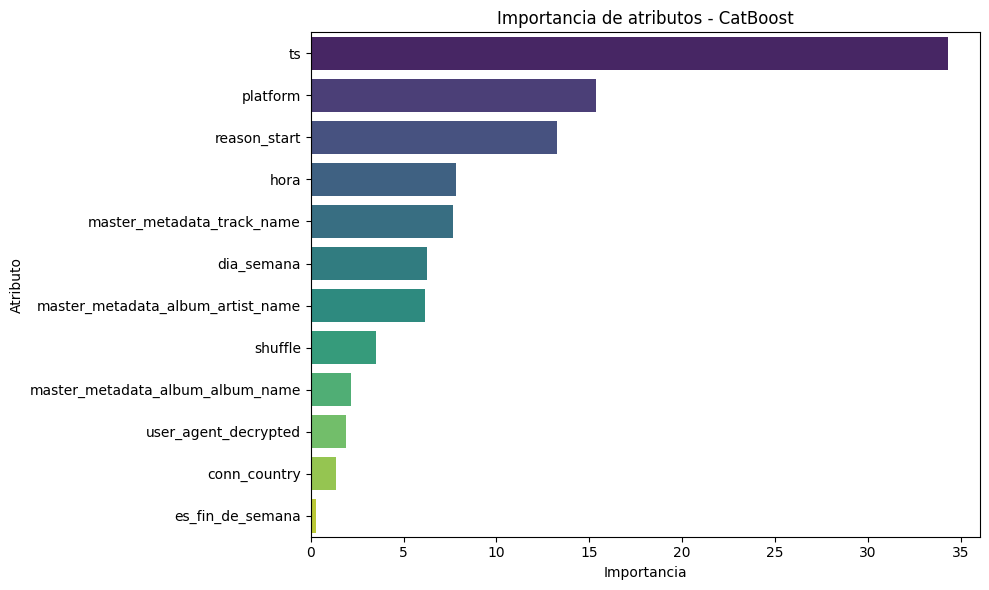

'\n'

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
#Graficar correlaciones de atributos y target
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_importancia.head(20),  # Top 20 más importantes
    x='importancia', y='atributo', palette='viridis'
)
plt.title('Importancia de atributos - CatBoost')
plt.xlabel('Importancia')
plt.ylabel('Atributo')
plt.tight_layout()
plt.show()

'''
'''

C:\Users\Belen\AppData\Local\Temp\ipykernel_12624\3436559607.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_importancia, x='importancia_pct', y='atributo', palette='viridis')


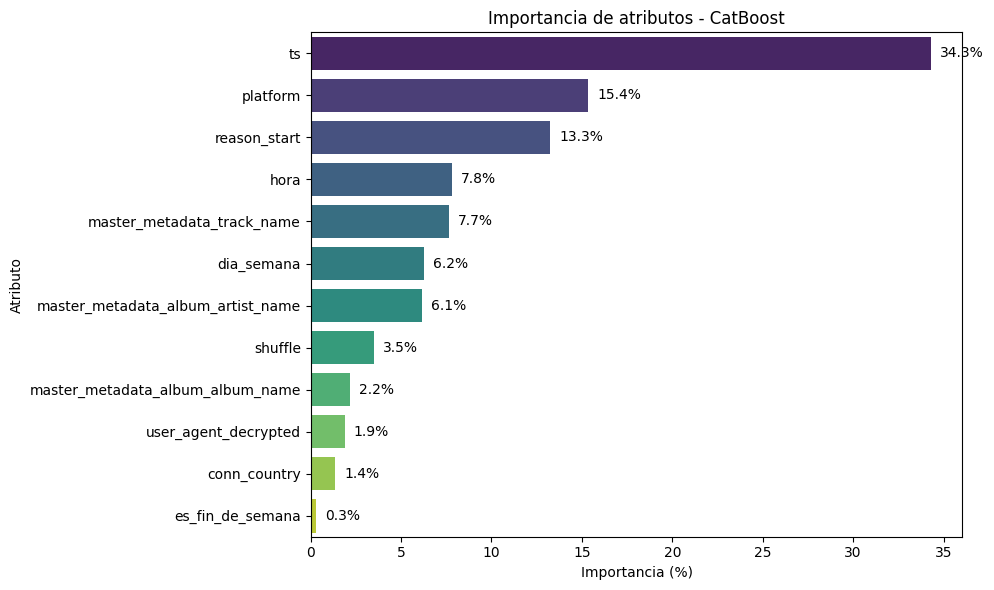

In [28]:
importancia = modelofinal.get_feature_importance()
columnas = X_train.columns

df_importancia = pd.DataFrame({
   'atributo': columnas,
   'importancia': importancia
})

# Calcular porcentajes
df_importancia['importancia_pct'] = 100 * df_importancia['importancia'] / df_importancia['importancia'].sum()
df_importancia = df_importancia.sort_values(by='importancia_pct', ascending=False).head(20)

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_importancia, x='importancia_pct', y='atributo', palette='viridis')
plt.title('Importancia de atributos - CatBoost')
plt.xlabel('Importancia (%)')
plt.ylabel('Atributo')

# Agregar los porcentajes encima de las barras
for i, (valor, atributo) in enumerate(zip(df_importancia['importancia_pct'], df_importancia['atributo'])):
   ax.text(valor + 0.5, i, f"{valor:.1f}%", va='center')

plt.tight_layout()
plt.show()


In [24]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

# solo columnas numéricas
df_num = canciones.select_dtypes(include='number')

# matriz de correlación
corr = df_num.corr(method='pearson')  # o 'spearman'
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlación entre atributos numéricos')
plt.show()

target_feature = 'tu_variable'
df_num.corrwith(df_num[target_feature]).sort_values(ascending=False)

'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# solo columnas numéricas\ndf_num = canciones.select_dtypes(include='number')\n\n# matriz de correlación\ncorr = df_num.corr(method='pearson')  # o 'spearman'\nplt.figure(figsize=(12, 10))\nsns.heatmap(corr, annot=False, cmap='coolwarm', center=0)\nplt.title('Correlación entre atributos numéricos')\nplt.show()\n\ntarget_feature = 'tu_variable'\ndf_num.corrwith(df_num[target_feature]).sort_values(ascending=False)\n\n"

### Genero file para submission de kaggle

In [ ]:
'''
submission = pd.read_csv("submission.csv", index_col=0)

submission = modify_file(submission, categorical_cols)

# Predicción
df_predicciones = pd.DataFrame({
    'ID': submission.index,
    'TARGET': modelofinal.predict_proba(submission)[:, 1]
})

# Guardar en un archivo CSV
df_predicciones.to_csv("predicciones_catboost.csv", index=False)

print("Predicciones guardadas en 'predicciones_catboost.csv'")

'''
from datetime import datetime


submission = pd.read_csv("submission.csv", index_col=0)

submission = modify_file(submission, categorical_cols)

# Predicción
df_predicciones = pd.DataFrame({
    'ID': submission.index,
    'TARGET': modelofinal.predict_proba(submission)[:, 1]
})

'''# Guardar en un archivo CSV
df_predicciones.to_csv("predicciones_catboost.csv", index=False)

print("Predicciones guardadas en 'predicciones_catboost.csv'")'''

# Obtener fecha y hora actual en formato breve
timestamp = datetime.now().strftime("%Y%m%d_%H-%M")

# Crear el nombre del archivo con el timestamp
filename = f"predicciones_catboost_{timestamp}.csv"

# Guardar en un archivo CSV
df_predicciones.to_csv(filename, index=False)

print(f"Predicciones guardadas en '{filename}'")

Predicciones guardadas en 'predicciones_catboost.csv'


'\n'